<a href="https://colab.research.google.com/github/yyousharashid-lab/CVPR/blob/main/Final/Assignment1/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt
import random



Load and prepare

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Train:", x_train.shape, y_train.shape)
print("Test :", x_test.shape, y_test.shape)

# Normalize to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0


Train: (60000, 28, 28) (60000,)
Test : (10000, 28, 28) (10000,)


visualize one digit

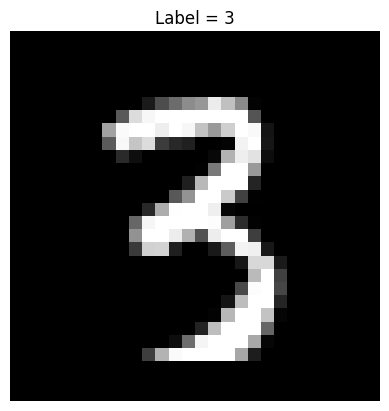

In [ ]:
i = random.randint(0, x_train.shape[0]-1)
plt.imshow(x_train[i], cmap="gray")
plt.title(f"Label = {y_train[i]}")
plt.axis("off")
plt.show()


neural network

In [ ]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),

    layers.Dense(256, activation="relu"),
    layers.Dropout(0.2),

    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),

    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),

    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,658 (983.04 KB)

 Trainable params: 251,658 (983.04 KB)

 Non-trainable params: 0 (0.00 B)

training

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.15,  # 15% of training data for validation
    verbose=1
)

Epoch 1/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7720 - loss: 0.7334 - val_accuracy: 0.9622 - val_loss: 0.1314
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9489 - loss: 0.1744 - val_accuracy: 0.9741 - val_loss: 0.0952
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9628 - loss: 0.1224 - val_accuracy: 0.9769 - val_loss: 0.0818
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9717 - loss: 0.0923 - val_accuracy: 0.9784 - val_loss: 0.0762
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9743 - loss: 0.0816 - val_accuracy: 0.9777 - val_loss: 0.0757


training vs validation

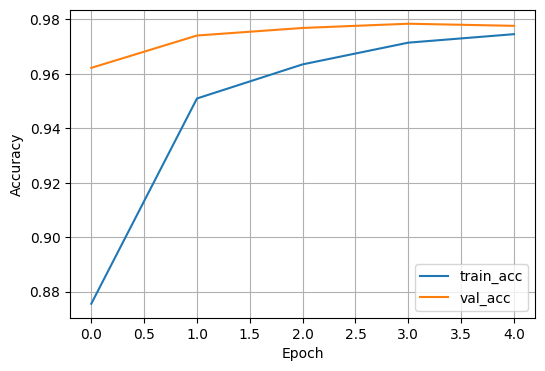

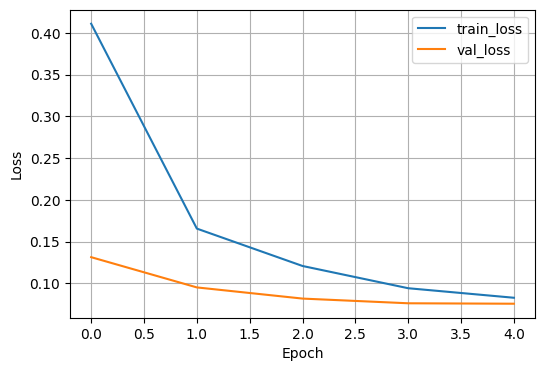

In [ ]:
# Accuracy plot
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


testing

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9779


save model

In [ ]:
from google.colab import files
files.download("mnist_nn.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save("mnist_nn.h5")
print("Model saved as mnist_nn.h5")


Model saved as mnist_nn.h5


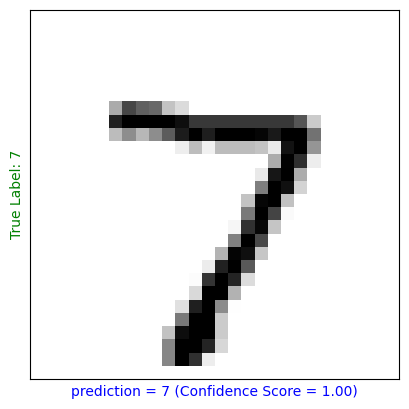

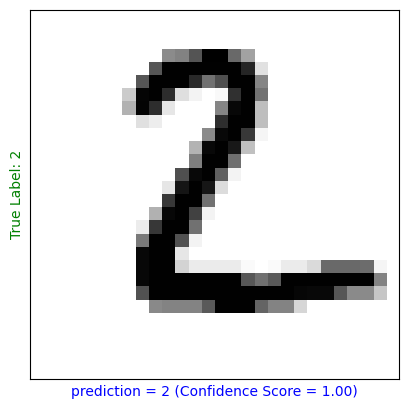

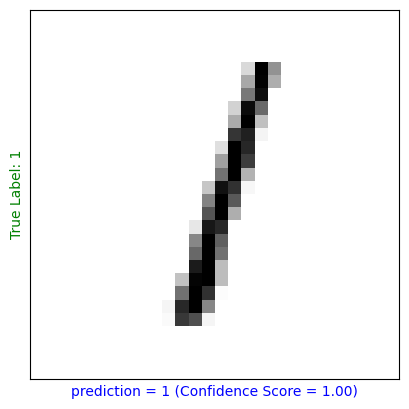

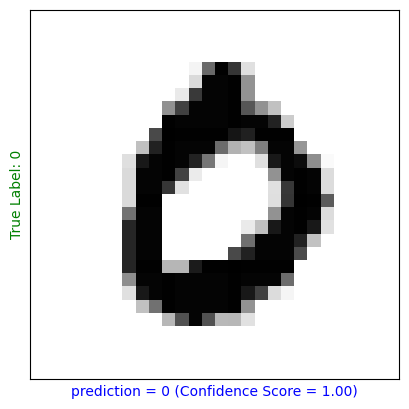

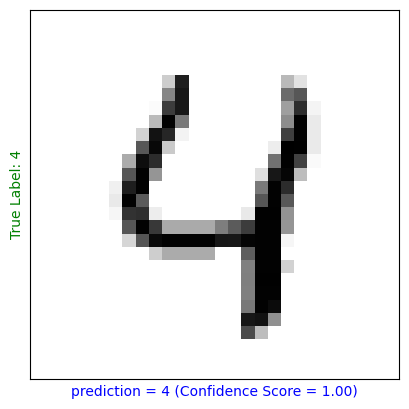

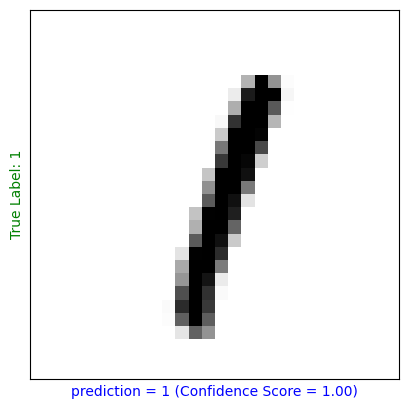

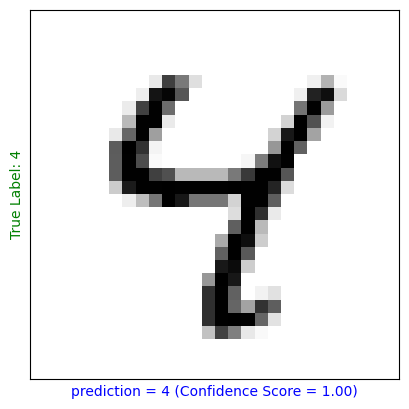

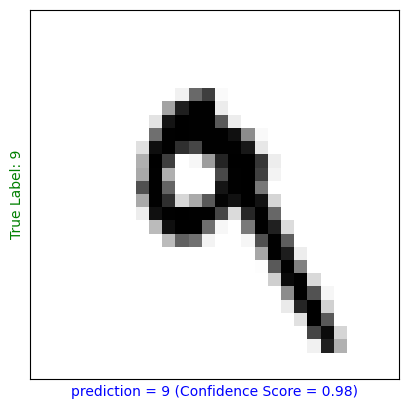

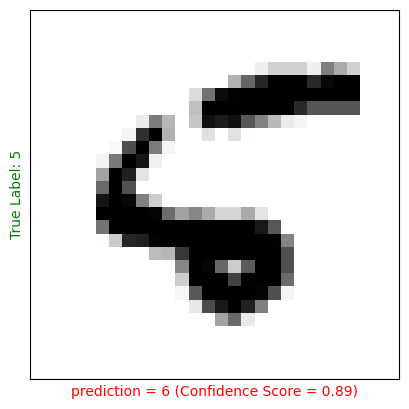

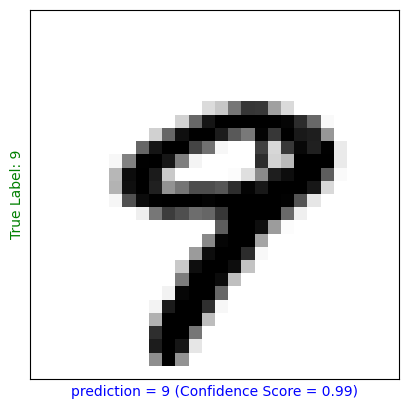

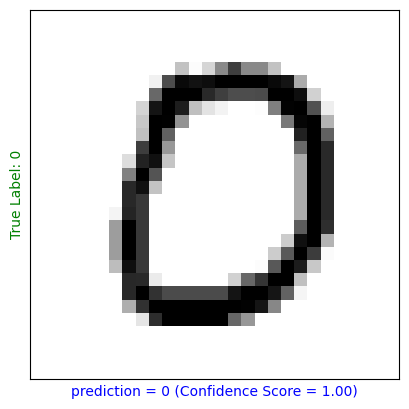

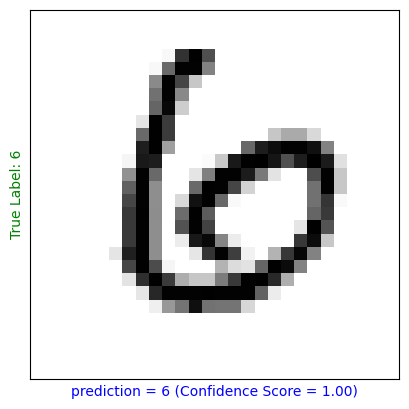

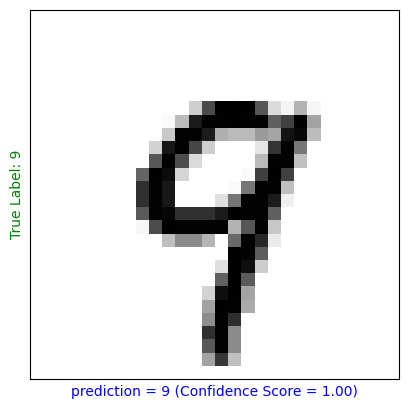

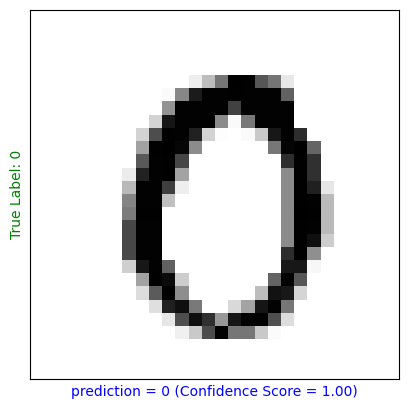

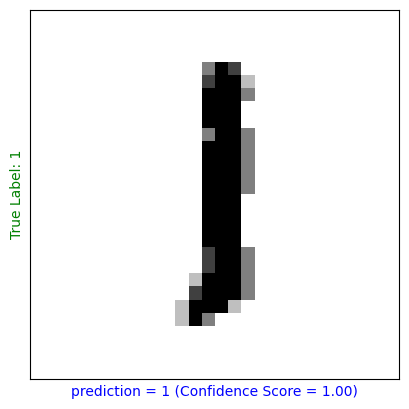

In [ ]:
for i in range(15):   # i = 0,1,2,3,4

    # take one test image
    img = x_test[i]          # shape: (28, 28)

    # run prediction
    predictions = model.predict(img.reshape(1, 28, 28), verbose=0)  # shape: (1, 10)

    plt.figure()

    # show the image (already 28x28)
    plt.imshow(img, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

    # ground truth label
    plt.ylabel(f"True Label: {y_test[i]}", color='g')

    # predicted label + confidence
    prediction = np.argmax(predictions)          # index of max probability
    confidence = predictions[0][prediction]      # probability of that class

    # blue if correct, red if wrong
    if y_test[i] == prediction:
        plt.xlabel(
            f"prediction = {prediction} (Confidence Score = {confidence:.2f})",
            color='b'
        )
    else:
        plt.xlabel(
            f"prediction = {prediction} (Confidence Score = {confidence:.2f})",
            color='r'
        )

    plt.show()
